Incêndios Florestais no Brasil
no csv pode ser encontrado o número de incêndios florestais notificados no Brasil por Estado, o que se configur em um sério problema para a preservação das Florestas Tropicais. Compreender a frequência dos incêndios numa série temporal pode ajudar a tomar medidas para os prevenir. O que se faz necessário, visto que o Brasil possui a maior floresta tropical do planeta, a floresta amazônica.

In [1]:
!pip install pandas


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: C:\Users\sofia\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("queimadas.csv", sep="," , encoding= 'ISO-8859-1') 
df

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


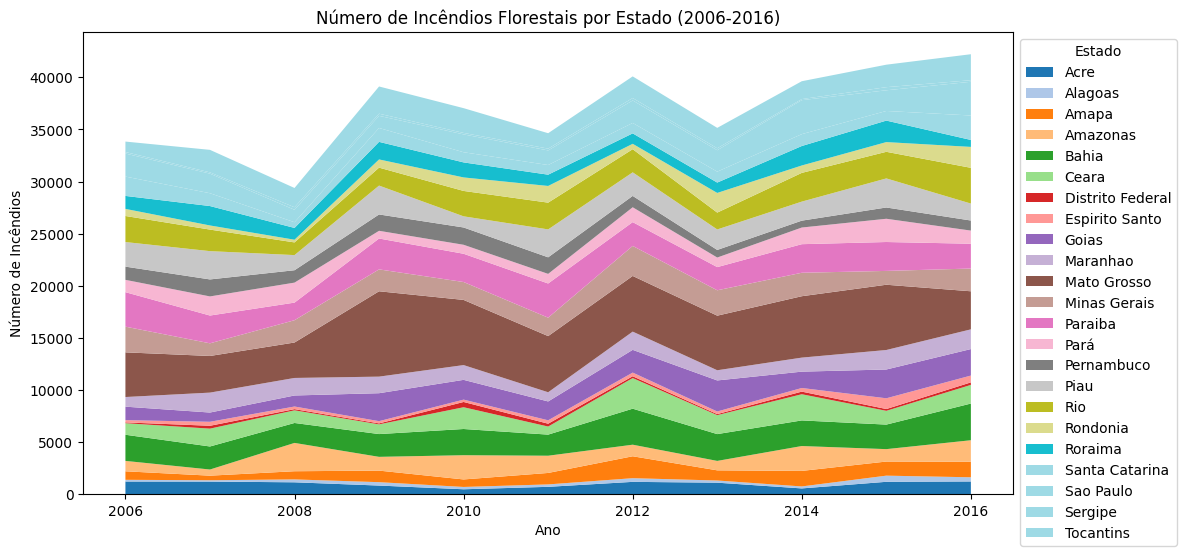

In [36]:
df = pd.read_csv("queimadas.csv", encoding='ISO-8859-1')

# filtra os dados para o período de 10 anos (por exemplo, de 2007 a 2017)
df = df[(df['year'] >= 2006) & (df['year'] <= 2016)]

# cria um DataFrame com um índice contendo todos os anos de 2007 a 2017
all_years = pd.DataFrame(index=range(2006, 2017))

# junta o DataFrame dos anos com os dados agrupados
grouped_data = all_years.join(df.groupby(['state', 'year'])['number'].sum().unstack().T).fillna(0)

colormap = plt.get_cmap('tab20')

# cria um gráfico de área empilhada
plt.figure(figsize=(12, 6))

states = grouped_data.columns
colors = [colormap(i) for i in range(len(states))]

plt.stackplot(grouped_data.index, [grouped_data[state] for state in states], colors=colors)

plt.legend(labels=states, title="Estado", loc='upper left', bbox_to_anchor=(1, 1))

plt.title("Número de Incêndios Florestais por Estado (2006-2016)")
plt.xlabel("Ano")
plt.ylabel("Número de Incêndios")
plt.show()


o gráfico apresentado relata o número de incêndios florestais no Brasil dividido por estados no período de 10 anos.

Com estes dados é possível avaliar a evolução dos incêndios ao longo dos anos, bem como as regiões onde se concentraram. Conclui-se que urge a necessidade para uma atenção a essa questão e em como ela impacta no aquecimento global.